**1. Data Sources & Collection**

"Synthetic Financial Datasets For Fraud Detection" dataset from Kaggle - 
https://www.kaggle.com/datasets/ealaxi/paysim1: 

**2. Import and Construct Dataset**

In [ ]:
# 2.1 Import Sample Data - 'ExportedSubsetData.csv'
# https://www.udacity.com/blog/2020/04/python-and-data-analysis-cheat-sheet.html

import rpy2
import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('ExportedSubsetData.csv')
#Print data frame
df

#Print the shape
print(df.shape)

#Dataset Info Summary
df.info()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(500000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            500000 non-null  int64  
 1   type            500000 non-null  object 
 2   amount          500000 non-null  float64
 3   nameOrig        500000 non-null  object 
 4   oldbalanceOrg   500000 non-null  float64
 5   newbalanceOrig  500000 non-null  float64
 6   nameDest        500000 non-null  object 
 7   oldbalanceDest  500000 non-null  float64
 8   newbalanceDest  500000 non-null  float64
 9   isFraud         500000 non-null  int64  
 10  isFlaggedFraud  500000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 42.0+ MB


In [ ]:
# 2.2 Runs the first 5 rows
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,182,CASH_OUT,129804.96,C557034178,0.00,0.00,C823541396,4225880.68,4355685.64,0,0
1,347,PAYMENT,31443.09,C106157646,523617.58,492174.49,M1964962587,0.00,0.00,0,0
2,37,CASH_IN,37045.02,C2119144137,563001.93,600046.95,C1617537788,1276384.02,1109350.62,0,0
3,321,CASH_IN,54229.95,C1783369537,0.00,54229.95,C1462363253,205541.10,151311.15,0,0
4,252,CASH_OUT,61214.57,C680060894,0.00,0.00,C534934221,364102.11,425316.68,0,0


In [ ]:
# 2.3 Investigate all the unique elements within each Feature or Column
# Quick way to see count or distinct value for each column
for column in df:
  unique_vals = np.unique(df[column])
  nr_values = len(unique_vals)
  if nr_values < 36:
    print('The number of values for feature {}: {} -- {}'.format(column, nr_values, unique_vals))
  else:
    print('The number of values for feature {}: {}'.format(column, nr_values))

The number of values for feature step: 603
The number of values for feature type: 5 -- ['CASH_IN' 'CASH_OUT' 'DEBIT' 'PAYMENT' 'TRANSFER']
The number of values for feature amount: 485638
The number of values for feature nameOrig: 499949
The number of values for feature oldbalanceOrg: 211244
The number of values for feature newbalanceOrig: 215745
The number of values for feature nameDest: 377824
The number of values for feature oldbalanceDest: 285224
The number of values for feature newbalanceDest: 302581
The number of values for feature isFraud: 2 -- [0 1]
The number of values for feature isFlaggedFraud: 2 -- [0 1]


In [ ]:
# 2.4 Convert "isFraud" variable to "object" type since this is the class variable.
df['isFraud'] = df['isFraud'].astype('object')
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            500000 non-null  int64  
 1   type            500000 non-null  object 
 2   amount          500000 non-null  float64
 3   nameOrig        500000 non-null  object 
 4   oldbalanceOrg   500000 non-null  float64
 5   newbalanceOrig  500000 non-null  float64
 6   nameDest        500000 non-null  object 
 7   oldbalanceDest  500000 non-null  float64
 8   newbalanceDest  500000 non-null  float64
 9   isFraud         500000 non-null  object 
 10  isFlaggedFraud  500000 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 42.0+ MB


**3. Statistical Summary**

In [ ]:
# 3.1 Statistic Summary of Numeric Variables:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,500000.000000,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,5.000000e+05,500000.000000,500000.000000
mean,243.759464,1.789901e+05,8.400977e+05,8.617305e+05,1.100420e+06,1.223259e+06,0.001272,0.000006
std,142.112201,5.811749e+05,2.893253e+06,2.929584e+06,3.315131e+06,3.575645e+06,0.035642,0.002449
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,156.000000,1.340111e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,240.000000,7.528301e+04,1.429194e+04,0.000000e+00,1.355260e+05,2.170527e+05,0.000000,0.000000
75%,335.000000,2.088550e+05,1.079942e+05,1.470306e+05,9.483535e+05,1.117092e+06,0.000000,0.000000
max,742.000000,5.778780e+07,4.381886e+07,4.368662e+07,3.278521e+08,3.279630e+08,1.000000,1.000000


In [ ]:
# 3.2 Statistic Summary of Categorical Variables:
from pandas import DataFrame
df1 = DataFrame(df, columns= ['type','nameOrig','nameDest','isFraud','isFlaggedFraud'])
stats = df1.describe(include='all')
print (stats)

            type    nameOrig     nameDest        isFraud  isFlaggedFraud
count     500000      500000       500000  500000.000000   500000.000000
unique         5      499949       377824            NaN             NaN
top     CASH_OUT  C269029988  C1501701470            NaN             NaN
freq      176069           2           13            NaN             NaN
mean         NaN         NaN          NaN       0.001272        0.000006
std          NaN         NaN          NaN       0.035642        0.002449
min          NaN         NaN          NaN       0.000000        0.000000
25%          NaN         NaN          NaN       0.000000        0.000000
50%          NaN         NaN          NaN       0.000000        0.000000
75%          NaN         NaN          NaN       0.000000        0.000000
max          NaN         NaN          NaN       1.000000        1.000000


**4. Data Sanity Checks**

In [ ]:
#4.1 Negative Transaction Amounts
print('Number of transactions where the transaction amount is negative: ' + str(sum(df['amount'] < 0)))

Number of transactions where the transaction amount is negative: 0


In [ ]:
#4.2 Missing or Null Values Check (version 1)
print('Number of missing values in any column: ' + str(df.isnull().sum().max()))

Number of missing values in any column: 0


In [ ]:
#4.3 Check for Null values (version 2)
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**5. Data Exploratory Analysis**

**5.1 - Class Imbalance: "IsFraud"**

In [ ]:
# 5.1.1 Evaluate "isFraud" class variable - the most frequent category and its frequency
df['isFraud'].describe(include='all')

count    500000.000000
mean          0.001272
std           0.035642
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: isFraud, dtype: float64

In [ ]:
# 5.1.2 Class Imbalance - Percentage Frequency for "isFraud" variable
dFraud = pd.DataFrame(df, columns= ['isFraud'])
# Percentage calculation
(dFraud['isFraud'].value_counts()/dFraud['isFraud'].count())*100

0    99.8728
1     0.1272
Name: isFraud, dtype: float64

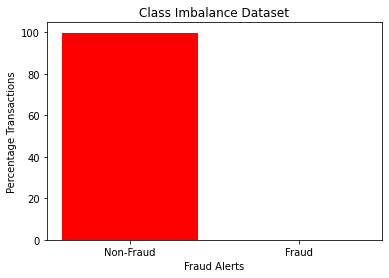

In [ ]:
# 5.1.3 Visualiazation - Histogram for Imbalance Data Visualization
import matplotlib.pyplot as plt
  
# x-coordinates of left sides of bars 
left = [1, 2]
  
# heights of bars
height = [99.8703, 0.1297]
  
# labels for bars
tick_label = ['Non-Fraud', 'Fraud']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['red', 'green'])
  
# naming the x-axis
plt.xlabel('Fraud Alerts')
# naming the y-axis
plt.ylabel('Percentage Transactions')
# plot title
plt.title('Class Imbalance Dataset')
  
# function to show the plot
plt.show()

**5.2 - Visualization of Correlations**

In [ ]:
# Convert the "type" transaction categorical data type to numerical data to enable analysis
# https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/
# Use.get_dummies function to convert the categorical datatype to numerical and storing the returned DataFrame in a new variable df1
df1 = pd.get_dummies(df['type'])
 
# Use pd.concat to concatenate the dataframes. df and df1 and storing the concatenated DataFrame in df.
df2 = pd.concat([df, df1], axis=1).reindex(df.index)
 
# Remove the column 'type' from df as it is of no use now.
df2.drop(['type'], axis=1, inplace=True)
 
df2

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,182,129804.96,C557034178,0.00,0.00,C823541396,4225880.68,4355685.64,0,0,0,1,0,0,0
1,347,31443.09,C106157646,523617.58,492174.49,M1964962587,0.00,0.00,0,0,0,0,0,1,0
2,37,37045.02,C2119144137,563001.93,600046.95,C1617537788,1276384.02,1109350.62,0,0,1,0,0,0,0
3,321,54229.95,C1783369537,0.00,54229.95,C1462363253,205541.10,151311.15,0,0,1,0,0,0,0
4,252,61214.57,C680060894,0.00,0.00,C534934221,364102.11,425316.68,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,401,21413.59,C1622603240,0.00,0.00,M985450773,0.00,0.00,0,0,0,0,0,1,0
499996,416,2191.29,C1007044003,3030.00,838.71,M1645934698,0.00,0.00,0,0,0,0,0,1,0
499997,577,528.96,C1485023730,757.44,228.48,M1067639124,0.00,0.00,0,0,0,0,0,1,0
499998,354,509.00,C20465577,58373.07,57864.07,M886344328,0.00,0.00,0,0,0,0,0,1,0


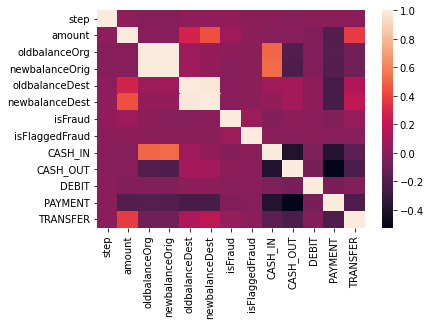

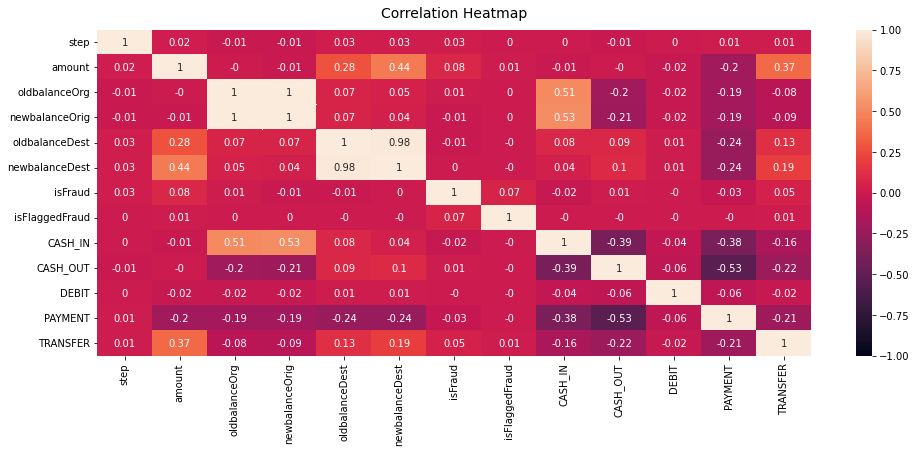

In [ ]:
# 5.2.1 Correlation Heatmap: all variables
# https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e#:~:text=%23%20Set%20the%20range%20of%20values,a%20title%20to%20the%20heatmap.
# NOTE: when running the code, DO NOT convert "isFraud" to Object - Skip #2.4
df.corr()
sns.heatmap(df2.corr());

# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df2.corr().round(2), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
# Print column name for ease of copy and pasting to code below
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

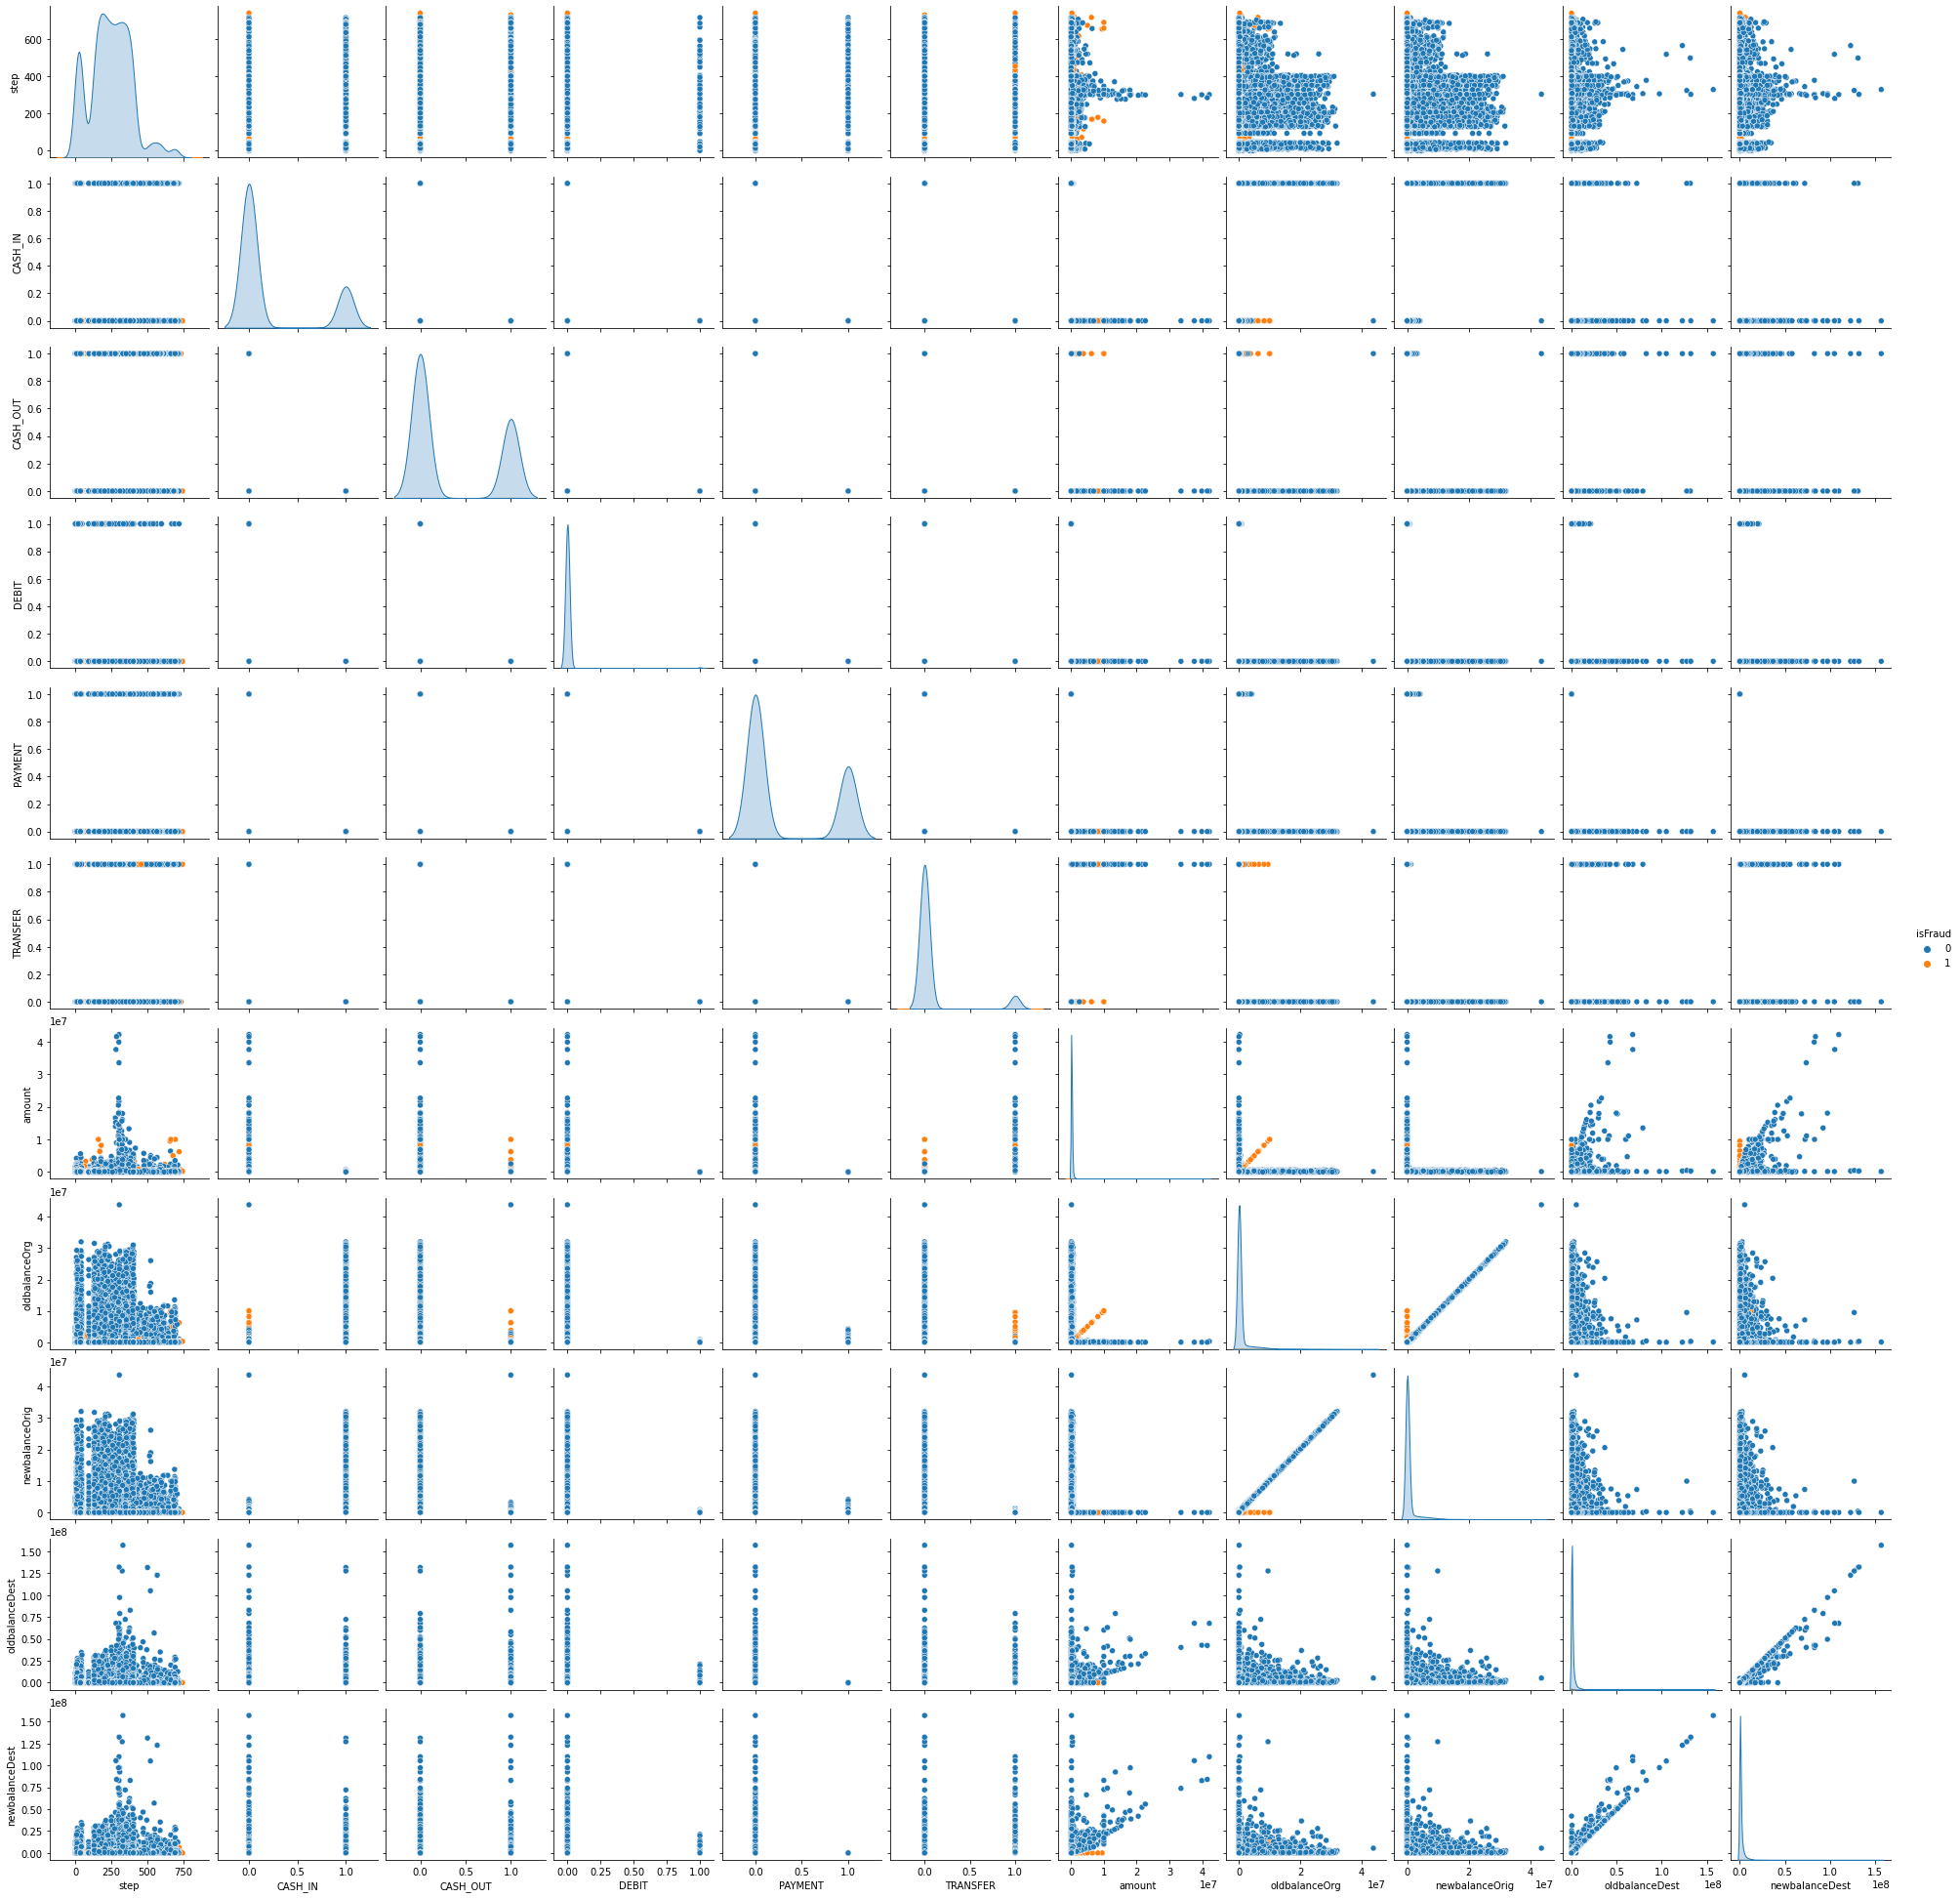

In [ ]:
# 5.2.2 Visualize the data using Seaborn Pairplots
# NOTE: Only able to run on dataset with 50,000 lines of records. Unable to run on 500,000 lines of records due to file size. 
#Limiting the data to include Numeric colummns (excluding nameOrig, nameDest, isFlaggedFraud)
dfVisual = df2[['step', 'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud']]

# Seaborn Pairplots
g = sns.pairplot(dfVisual, hue='isFraud', diag_kws={'bw': 0.2})

**5.3 - Fraud Transaction on Type of Transactions - "type"**

In [ ]:
# 5.3.1 Type of Transactions
df['type'].describe(include='all')
# Percentage Frequency-Type
dType = pd.DataFrame(df, columns= ['type'])
# Percentage calculation
#(dType['type'].value_counts()/dType['type'].count())*100
# Type - Count of Volume
(dType['type'].value_counts())

CASH_OUT    176069
PAYMENT     168601
CASH_IN     110527
TRANSFER     41573
DEBIT         3230
Name: type, dtype: int64

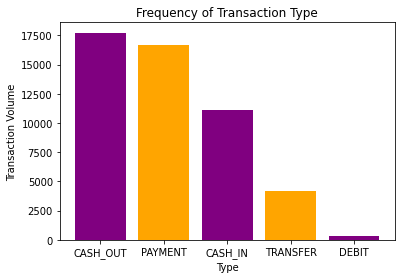

In [ ]:
# Histogram for Type
# x-coordinates of left sides of bars 
left = [1, 2, 3, 4, 5]
  
# heights of bars
height = [17723, 16665, 11129, 4156, 327]
  
# labels for bars
tick_label = ['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']
  
# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
        width = 0.8, color = ['purple','orange'])
  
# naming the x-axis
plt.xlabel('Type')
# naming the y-axis
plt.ylabel('Transaction Volume')
# plot title
plt.title('Frequency of Transaction Type')
  
# function to show the plot
plt.show()

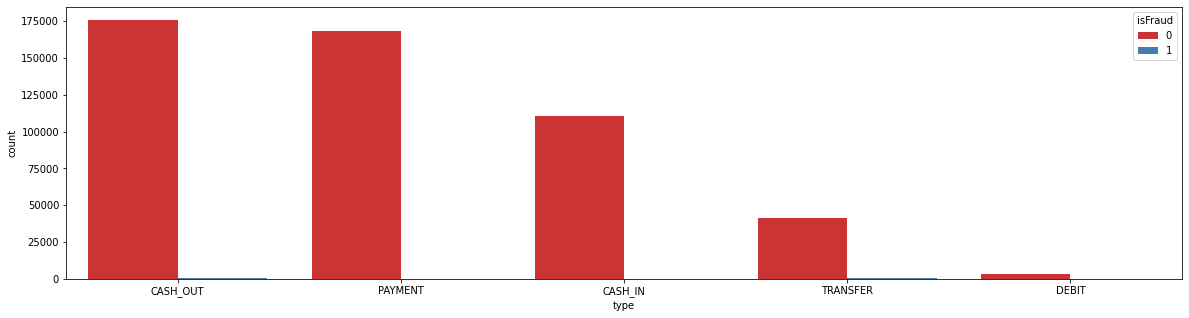

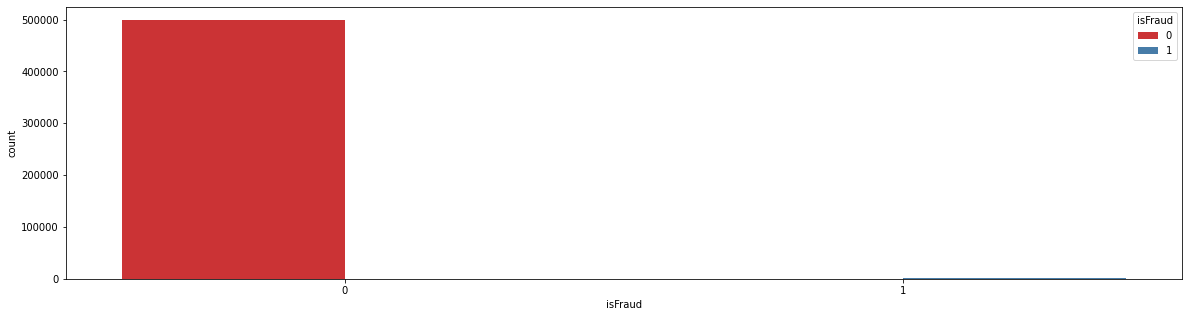

In [ ]:
# 5.3.2 Correlation between transaction type and "isFraud"
# Seaborn plot or Resize:  https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
CatFeatures = ['type','isFraud']

for f in CatFeatures:
  plt.figure(figsize = (20,5))
  #ax = sns.countplot(x=f, data=dfVisual, hue = 'isFraud', palette = "Set1")
  ax = sns.countplot(x=f, data=df, hue = 'isFraud', palette = "Set1")

In [ ]:
# 5.3.3 Counting # of Fraudulent transactions per transaction "type"
print('\n The types of fraudulent transactions are {}'.format(\
list(df.loc[df.isFraud == 1].type.drop_duplicates().values)))

dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]

print ('\n The number of fraudulent TRANSFER = {}'.\
       format(len(dfFraudTransfer)))
print ('\n The number of fraudulent CASH_OUT = {}'.\
       format(len(dfFraudCashout)))


 The types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']

 The number of fraudulent TRANSFER = 303

 The number of fraudulent CASH_OUT = 333


**5.4 - Comparison - "oldbalanceDest" and "newbalanceDest"**

In [ ]:
# REFERENCE:  https://www.kaggle.com/code/arjunjoshua/predicting-fraud-in-financial-payment-services/notebook

X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
randomState = 5
np.random.seed(randomState)
#X = X.loc[np.random.choice(X.index, 100000, replace = False)]

Y = X['isFraud']
del X['isFraud']

# Eliminate columns shown to be irrelevant for analysis
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

# Binary-encoding of labelled data in 'type'
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int) # convert dtype('O') to dtype(int)

Xfraud = X.loc[Y == 1]
XnonFraud = X.loc[Y == 0]
print('\nThe fraction of fraudulent transactions with \'oldBalanceDest\' = \
\'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(Xfraud.loc[(Xfraud.oldbalanceDest == 0) & \
(Xfraud.newbalanceDest == 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))

print('\nThe fraction of genuine transactions with \'oldBalanceDest\' = \
\'newBalanceDest\' = 0 although the transacted \'amount\' is non-zero is: {}'.\
format(len(XnonFraud.loc[(XnonFraud.oldbalanceDest == 0) & \
(XnonFraud.newbalanceDest == 0) & (XnonFraud.amount)]) / (1.0 * len(XnonFraud))))


The fraction of fraudulent transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.47327044025157233

The fraction of genuine transactions with 'oldBalanceDest' = 'newBalanceDest' = 0 although the transacted 'amount' is non-zero is: 0.0005391555993843488


In [ ]:
# Recipient's Final Balance : contrary to Al Marri's finding - 0.6% (p.24)
df['newbalanceDest'].describe(include='0')
# Percentage Frequency-Type
DestNew = pd.DataFrame(df, columns= ['newbalanceDest'])
# Percentage calculation
#(dType['type'].value_counts()/dType['type'].count())*100
# Type - Count of Volume
(DestNew['newbalanceDest'].value_counts()/DestNew['newbalanceDest'].count())*100

0.00          38.2328
4463342.00     0.0008
2987.47        0.0008
1256391.00     0.0008
1263697.00     0.0008
               ...   
242766.60      0.0002
865778.50      0.0002
4286586.00     0.0002
582461.20      0.0002
6718365.00     0.0002
Name: newbalanceDest, Length: 302581, dtype: float64

In [ ]:
#Defining inaccuracies in originator and recipient balances
df['origBalance_inacc'] = (df['oldbalanceOrg'] - df['amount']) - df['newbalanceOrig']
#count = (df['origBalance_inacc'] != 0).sum()/df['origBalance_inacc'].count()*100
C1 = (df['origBalance_inacc'] == 0).sum()
C2 = (df['origBalance_inacc'] != 0).sum()
#fraudCount1 = Xfraud.C1
#fraudCount2 = Xfraud.C2
print('Count of origBalance accurate : ', C1)
print('Count of origBalance Inaccurate : ', C2)


Count of origBalance accurate :  51707
Count of origBalance Inaccurate :  448293


In [ ]:
df['destBalance_inacc'] = (df['oldbalanceDest'] - df['amount']) - df['newbalanceDest']
#count = (df['destBalance_inacc'] != 0).sum()/df['destBalance_inacc'].count()*100
count = (df['destBalance_inacc'] != 0).sum()
print('Count of destBalance Inaccurate : ', count)

Count of destBalance Inaccurate :  486639


In [ ]:
print('\nThe fraudulent transactions with \'origBalance Inacc\' is non-zero is: {}'.\
format(len(Xfraud.loc[(Xfraud.df['origBalance_inacc'] != 0) & \
(Xfraud.df['origBalance_inacc'] != 0) & (Xfraud.amount)]) / (1.0 * len(Xfraud))))

**5.5 - Check Any Identifiable Trend or Anomaly with Fraudulent Transactions**

In [ ]:
# REFERENCE:  https://www.kaggle.com/code/arjunjoshua/predicting-fraud-in-financial-payment-services/notebook

dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
print('\nIn fraudulent transactions, any destination for TRANSFERS is also originator for CASH_OUT? {}'.format(\
(dfFraudTransfer.nameDest.isin(dfFraudCashout.nameOrig)).any()))
dfNotFraud = df.loc[df.isFraud == 0]


In fraudulent transactions, any destination for TRANSFERS is also originator for CASH_OUT? False


In [ ]:
# 5.5.2 - Could destination accounts for fraudulent TRANSFERs originate CASHOUTs that are not detected and are labeled as genuine? 
print('\nFraudulent TRANSFERs whose destination accounts are originators of \
genuine CASH_OUTs: \n\n{}'.format(dfFraudTransfer.loc[dfFraudTransfer.nameDest.\
isin(dfNotFraud.loc[dfNotFraud.type == 'CASH_OUT'].nameOrig.drop_duplicates())]))


Fraudulent TRANSFERs whose destination accounts are originators of genuine CASH_OUTs: 

Empty DataFrame
Columns: [step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, isFlaggedFraud]
Index: []


In [ ]:
# 5.5.3 - Check Min and Max amount of frauduent transaction
print('\nThe type of transactions in which isFraud is set: \
{}'.format(list(df.loc[df.isFraud == 1].type.drop_duplicates()))) 
                                                           
dfTransfer = df.loc[df.type == 'TRANSFER']
dfFlagged = df.loc[df.isFraud == 1]
dfNotFlagged = df.loc[df.isFraud == 0]

print('\nMin amount transacted when isFraud is set= {}'\
                                  .format(dfFlagged.amount.min()))

print('\nMax amount transacted in a TRANSFER where isFraud is \
 {}'.format(dfTransfer.loc[dfTransfer.isFraud == 0].amount.max()))


The type of transactions in which isFraud is set: ['TRANSFER', 'CASH_OUT']

Min amount transacted when isFraud is set= 0.0

Max amount transacted in a TRANSFER where isFraud is  57787801.0


In [ ]:
# 5.5.4
print('\nHave originators of transactions flagged as fraud transacted more than \
once? {}'\
.format((dfFlagged.nameOrig.isin(pd.concat([dfNotFlagged.nameOrig, \
                                    dfNotFlagged.nameDest]))).any())) # False

print('\nHave destinations for transactions flagged as fraud initiated\
 other transactions? \
{}'.format((dfFlagged.nameDest.isin(dfNotFlagged.nameOrig)).any())) # False

# Since only 2 destination accounts of 16 that have 'isFlaggedFraud' set have been
# destination accounts more than once,
# clearly 'isFlaggedFraud' being set is independent of whether a 
# destination account has been used before or not

print('\nHow many destination accounts of transactions flagged as fraud have been \
destination accounts more than once?: {}'\
.format(sum(dfFlagged.nameDest.isin(dfNotFlagged.nameDest)))) # 2


Have originators of transactions flagged as fraud transacted more than once? False

Have destinations for transactions flagged as fraud initiated other transactions? False

How many destination accounts of transactions flagged as fraud have been destination accounts more than once?: 199


**5.6 - Fraudulent Transaction Dispersion Over Time - "Step"**

In [ ]:
# REFERENCE:  https://www.kaggle.com/code/arjunjoshua/predicting-fraud-in-financial-payment-services/notebook
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

randomState = 5
np.random.seed(randomState)

#X = X.loc[np.random.choice(X.index, 100000, replace = False)]

Y = X['isFraud']
del X['isFraud']

# Eliminate columns shown to be irrelevant for analysis in the EDA
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

# Binary-encoding of labelled data in 'type'
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int) # convert dtype('O') to dtype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


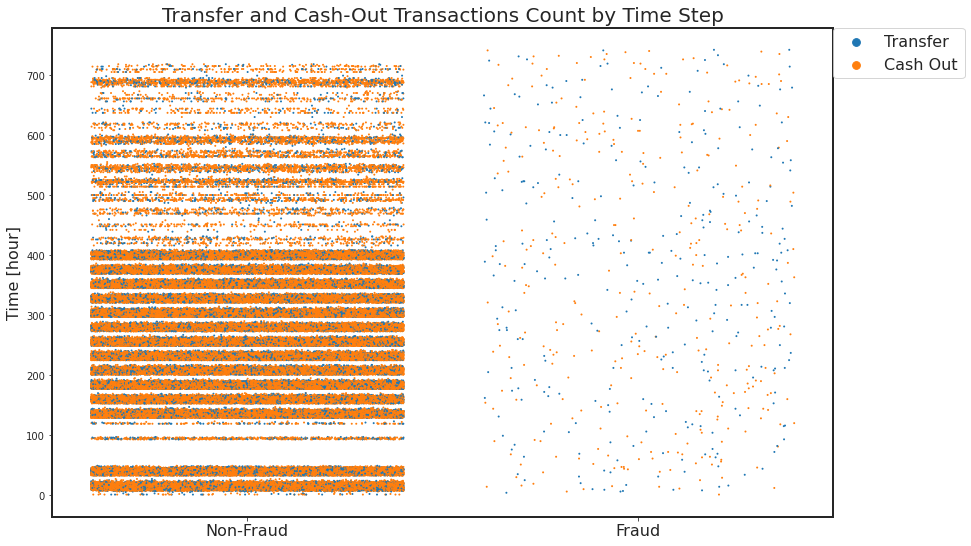

In [ ]:
limit = len(X)

def plotStrip(x, y, hue, figsize = (14, 9)):
    
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x, y, \
             hue = hue, jitter = 0.4, marker = '.', \
             size = 4, palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['Non-Fraud', 'Fraud'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['Transfer', 'Cash Out'], bbox_to_anchor=(1, 1), \
               loc=2, borderaxespad=0, fontsize = 16);
    return ax

ax = plotStrip(Y[:limit], X.step[:limit], X.type[:limit])
ax.set_ylabel('Time [hour]', size = 16)
ax.set_title('Transfer and Cash-Out Transactions Count by Time Step', size = 20);

**5.7 - Fraudulent Transaction Dispersion Over Amount**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


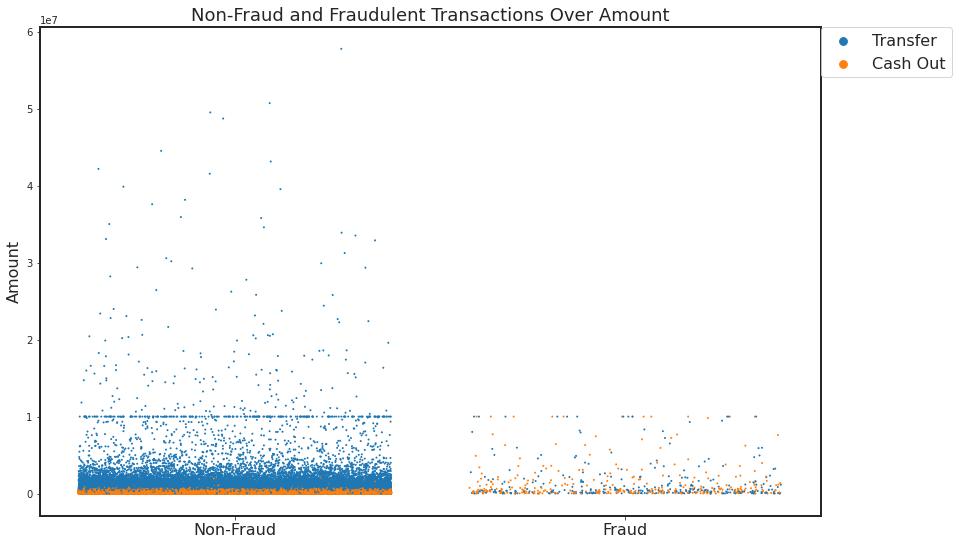

In [ ]:
# REFERENCE:  https://www.kaggle.com/code/arjunjoshua/predicting-fraud-in-financial-payment-services/notebook
limit = len(X)
ax = plotStrip(Y[:limit], X.amount[:limit], X.type[:limit], figsize = (14, 9))
ax.set_ylabel('Amount', size = 16)
ax.set_title('Non-Fraud \
and Fraudulent Transactions Over Amount', size = 18);

**5.8 - Dispersion over Error in "Destination Account Balance" and "Originator's Account Balance"**

In [ ]:
# REFERENCE:  https://www.kaggle.com/code/arjunjoshua/predicting-fraud-in-financial-payment-services/notebook
X.loc[(X.oldbalanceDest == 0) & (X.newbalanceDest == 0) & (X.amount != 0), \
      ['oldBalanceDest', 'newBalanceDest']] = - 1

X.loc[(X.oldbalanceOrg == 0) & (X.newbalanceOrig == 0) & (X.amount != 0), \
      ['oldBalanceOrig', 'newBalanceOrig']] = np.nan

X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


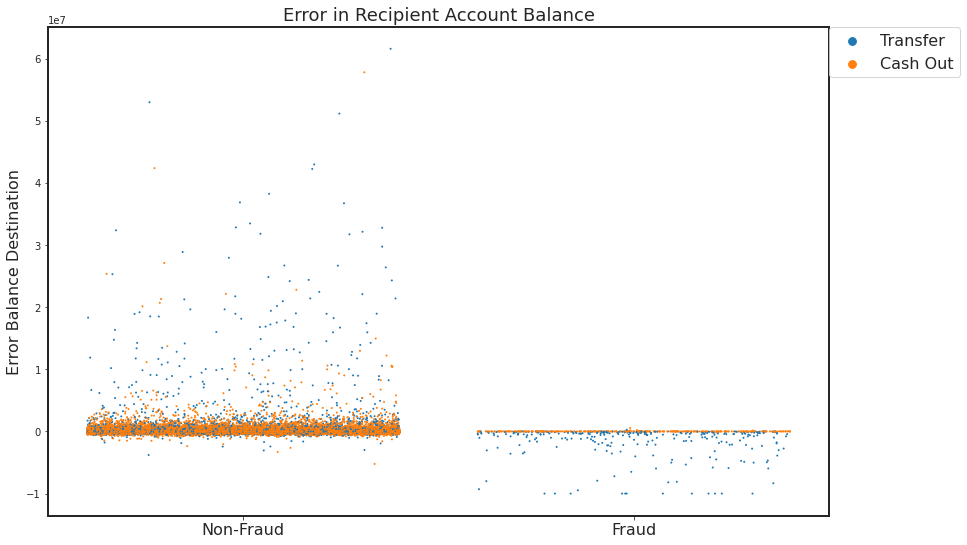

In [ ]:
limit = len(X)
ax = plotStrip(Y[:limit], - X.errorBalanceDest[:limit], X.type[:limit], \
              figsize = (14, 9))
ax.set_ylabel('Error Balance Destination', size = 16)
ax.set_title('Error in \
Recipient Account Balance', size = 18);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


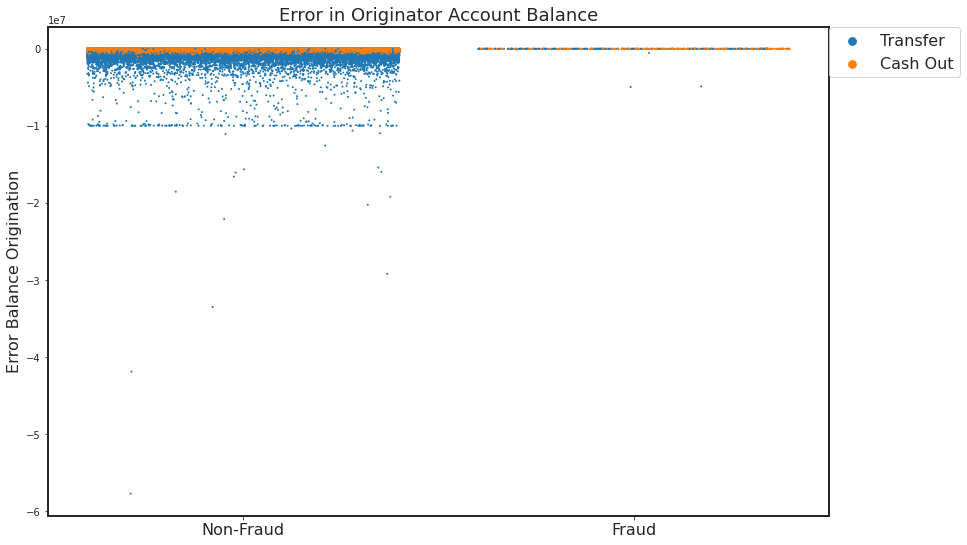

In [ ]:
limit = len(X)
ax = plotStrip(Y[:limit], - X.errorBalanceOrig[:limit], X.type[:limit], \
              figsize = (14, 9))
ax.set_ylabel('Error Balance Origination', size = 16)
ax.set_title('Error in \
Originator Account Balance', size = 18);

**5.9 - Separate Fraudulent from Non-Fraudulent Transactions**

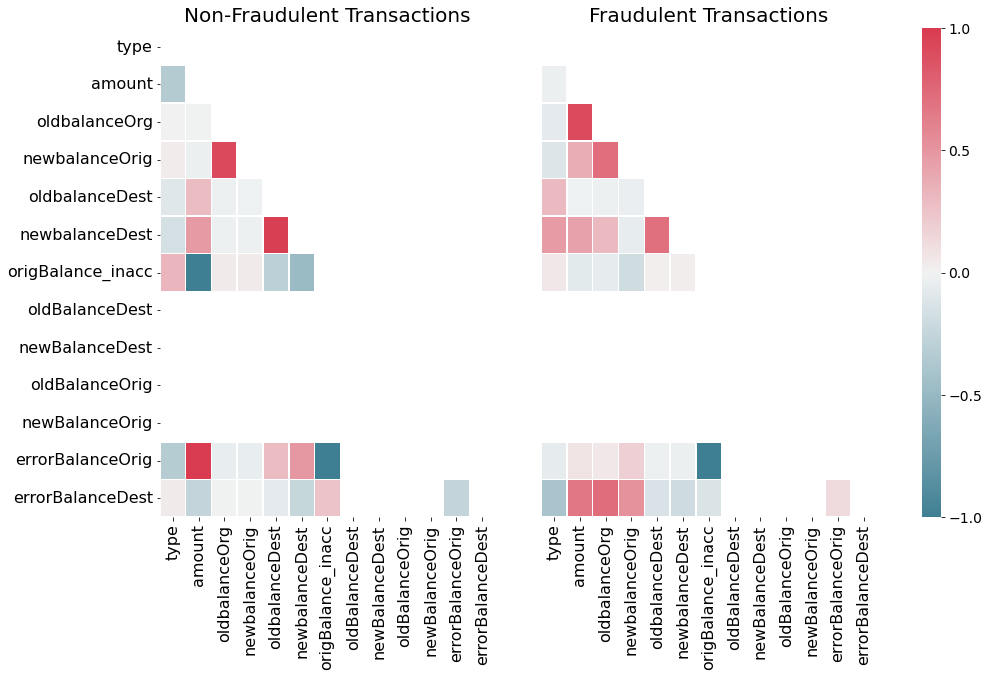

In [ ]:
#https://www.kaggle.com/code/arjunjoshua/predicting-fraud-in-financial-payment-services/notebook
Xfraud = X.loc[Y == 1] # update Xfraud & XnonFraud with cleaned data
XnonFraud = X.loc[Y == 0]
                  
correlationNonFraud = XnonFraud.loc[:, X.columns != 'step'].corr()
mask = np.zeros_like(correlationNonFraud)
indices = np.triu_indices_from(correlationNonFraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, \
                                     figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 =sns.heatmap(correlationNonFraud, ax = ax1, vmin = -1, vmax = 1, \
    cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16); 
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16); 
ax1.set_title('Non-Fraudulent Transactions', size = 20)

correlationFraud = Xfraud.loc[:, X.columns != 'step'].corr()
ax2 = sns.heatmap(correlationFraud, vmin = -1, vmax = 1, cmap = cmap, \
 ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False, \
    cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', \
                                 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16); 
ax2.set_title('Fraudulent Transactions', size = 20);

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14);

**6.0 - Measure Performance of Logistic Regression, SVM, Random Forest using Cross Validation Score**

In [ ]:
# Simulate the final dataset after cleaning and categorical conversion
# Remove Variables not needed for Calssification
newData = df.drop(['nameOrig', 'nameDest'], axis=1)

# Retain only CASH-OUT and TRANSFER transactions
newData = newData.loc[newData['type'].isin(['CASH_OUT', 'TRANSFER']),:]

# Convert categorical varaible to numeric representation
# Encoding categorical "type" variable to convert transation type to binary variables
newData = pd.get_dummies(newData, columns=['type'], prefix=['type'])

In [ ]:
# Define X and y
feature_cols = ['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','type_CASH_OUT','type_TRANSFER']
X = newData[feature_cols] # Features
y = newData.isFraud # Target variable

In [ ]:
# Stratified K Fold Cross Validation: Better than K-Fold, in a way that when separating out folds, it will divide each classification categories in uniformed way
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)
def get_score(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [ ]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(), digits.data, digits.target)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(), digits.data, digits.target)

array([0.93055556, 0.9       , 0.9637883 , 0.95821727, 0.91643454])

In [ ]:
# Tuning parameters to identify the one produce best performance 
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestClassifier(n_estimators=30), digits.data, digits.target)

array([0.92222222, 0.89722222, 0.96100279, 0.97493036, 0.92200557])

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(XGBClassifier(), digits.data, digits.target)

array([0.93611111, 0.88055556, 0.95264624, 0.94707521, 0.8718663 ])